# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 

In [3]:
m = [10, 20, 50, 100, 1000]

matrix = []
vector = []

for i in m:
    A, b = main.random_matrix_Ab(i)
    print('m = {}\nMacierz = {}\nWektor = {}\n'.format(i, A, b))
    matrix.append(A)
    vector.append(b)

m = 10
Macierz = [[31 49 69 80 33 67 19 12 65 64]
 [41 39 78 28 77 40 12 14 27 86]
 [89 34 15 82 76 52 62 22 47 70]
 [21 83 57 28 76 75 48 93 88 91]
 [44 10 76 29  6 75 17 90 71 36]
 [91  0 87 17 83 59 85 69 12 14]
 [63 71 40 11 96 13 91 76 83  1]
 [35 81 41 87 50 55 91 62 96 47]
 [94 19 74 48 84 83 13 70 98 33]
 [55 48 90 42 87  9 90 95  6 35]]
Wektor = [ 9 12 16 49 26 51 24 35 66 61]

m = 20
Macierz = [[82 84 33 37  5  4 52 28 47 70 88 77 10 73 44 89 56 29 20  2]
 [45 56 17 87 48 10 15 95 63 20 58 33 55 46 85 63 24 83 65 44]
 [77  3 16  6 65 97 58 25 71 47 21 84 37 73 59  5 22 53 46 51]
 [60 57 40 12 19 17 57 86  7 74 46 83 19 21 43  1 40  4 53 54]
 [89 16 69  1  9 21  9 20 69 38 63 46 43 20 72 69 12  6 71 26]
 [15 64 34 40 84 46 22 10 23 40 29 56 20 98 76 27 21 42  4 74]
 [13 39 53 51 81 87 39  2 29 85 48 93 85 12 87  8 55 21 86 86]
 [61 56 65 33 18 58 30 21 95 68 25 81 27 67 12 33 52 10 53 83]
 [ 7 72 77 17 15 25  8 58 52 41 80 78 92  6 22 81 33 51 38 92]
 [70 44  8 15 24 27 22  2 

***Zadanie 2***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 

Wygenenerowałem nowe macierze dla tego przykładu, aby wszystko działo się w jednej pętli

In [6]:
m = [10, 20, 50, 100, 1000]
counter = 0
for i in m:
    print('Dla macierzy i wektora nr. {} o m = {}\n'.format(counter+1, i))
    # Ad 1
    m_solution = np.linalg.solve(matrix[counter], vector[counter])
    print('Rozwiązanie układu równań Ax = b: {}\n'.format(m_solution))
    # Ad 2
    m_norm = main.residual_norm(matrix[counter], m_solution, vector[counter])
    print('Norma: {}\n'.format(m_norm))
    # Ad 3
    m_cond = np.linalg.cond(matrix[counter])
    print('Uwarunkowanie macierzy A = {}\n'.format(m_cond))
    counter = counter + 1

Dla macierzy i wektora nr. 1 o m = 10

Rozwiązanie układu równań Ax = b: [-1.51173042 -1.55238758 -0.09337561  0.83708339  1.50041509  0.14013568
  0.05567597  0.64878557  0.28898936 -0.23630449]

Norma: 5.54951617168815e-14

Uwarunkowanie macierzy A = 114.4471246432269

Dla macierzy i wektora nr. 2 o m = 20

Rozwiązanie układu równań Ax = b: [ 0.49517479  0.69583309 -0.8106657  -0.44429659  2.92816176 -1.60740613
 -1.11836381 -0.08055261  0.08513871 -0.84989998 -1.17859984  2.49743208
 -0.45677434 -0.62552634 -0.75610039  1.54957895  0.29903034 -1.100715
  0.66306184 -0.12865675]

Norma: 2.1375411956357942e-13

Uwarunkowanie macierzy A = 170.73109747894503

Dla macierzy i wektora nr. 3 o m = 50

Rozwiązanie układu równań Ax = b: [-4.29009732e-01  1.46224612e+00  9.50204985e-01 -7.50156607e-01
  1.43118599e-01 -2.97663090e-01 -1.32358380e-01  7.95021924e-01
  1.93489417e-01 -2.35909062e-01  5.25067772e-01  1.97231807e-01
 -1.09558528e+00 -1.13063859e-01  7.38638121e-01  3.63851238e-01


Ad. 4

Zakresy wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników.
Norma jest większa, im większa jest macierz, zatem zmniejsza się dokładność przeprowadzonych obliczeń.

***Zadanie 3***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [7]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:
    - wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej,
    - wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych,
    - wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 
    
    W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak pokazanow w przykładzie wyżej. 

3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 

In [25]:
# Ad 2
m = [10, 20, 50, 100, 1000]

sing_val = []
order_sing_val_low = []
order_sing_val_gre = []

matrix_SVD_log = []
matrix_SVD_low = []
matrix_SVD_gre = []

for i in m:
    sing_val.append(main.log_sing_value(i, 0, i))
    order_sing_val_low.append(main.order_sing_value(i, -10, 'low'))
    order_sing_val_gre.append(main.order_sing_value(i, 10, 'gre'))

for i in range(len(matrix)):
    matrix_SVD_log.append(main.create_matrix_from_A(matrix[i], sing_val[i]))
    matrix_SVD_low.append(main.create_matrix_from_A(matrix[i], order_sing_val_low[i]))
    matrix_SVD_gre.append(main.create_matrix_from_A(matrix[i], order_sing_val_gre[i]))

# Ad 3
cond_log = []
cond_low = []
cond_gre = []

for i in range(len(matrix)):
    cond_log.append(np.linalg.cond(matrix_SVD_log[i]))
    cond_low.append(np.linalg.cond(matrix_SVD_low[i]))
    cond_gre.append(np.linalg.cond(matrix_SVD_gre[i]))

print('Współczynniki uwarunkowania macierzy dla log_sing_value:')
for i in range(len(matrix)):
    print('Dla macierzy o m = {}: {}'.format(m[i], cond_log[i]))

print('\nWspółczynniki uwarunkowania macierzy dla order_sing_value(low):')
for i in range(len(matrix)):
    print('Dla macierzy o m = {}: {}'.format(m[i], cond_low[i]))

print('\nWspółczynniki uwarunkowania macierzy dla order_sing_value(gre):')
for i in range(len(matrix)):
    print('Dla macierzy o m = {}: {}'.format(m[i], cond_gre[i]))

Współczynniki uwarunkowania macierzy dla log_sing_value:
Dla macierzy o m = 10: 10000000637.331884
Dla macierzy o m = 20: 1.0975217488210483e+17
Dla macierzy o m = 50: 2.856006666162828e+18
Dla macierzy o m = 100: 5.747437162778797e+18
Dla macierzy o m = 1000: nan

Współczynniki uwarunkowania macierzy dla order_sing_value(low):
Dla macierzy o m = 10: 7707118740982.48
Dla macierzy o m = 20: 1.6420450456951005e+17
Dla macierzy o m = 50: 1971896992819.0183
Dla macierzy o m = 100: 55972422380327.89
Dla macierzy o m = 1000: 694516327274.14

Współczynniki uwarunkowania macierzy dla order_sing_value(gre):
Dla macierzy o m = 10: 1.689191737797657e+17
Dla macierzy o m = 20: 1.043377809970075e+17
Dla macierzy o m = 50: 3692762416768.5996
Dla macierzy o m = 100: 170277483203.48746
Dla macierzy o m = 1000: 440793606745593.5


Ad. 4 

Aby obliczyć współczynnik uwarunkowania nie jest konieczne wyliczanie macierzy.
Jego wartość to iloraz największej wartości singularnej z najmniejszą wartością singularną.

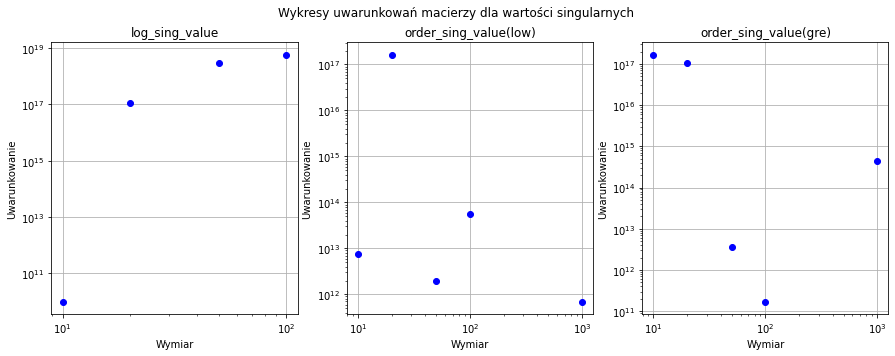

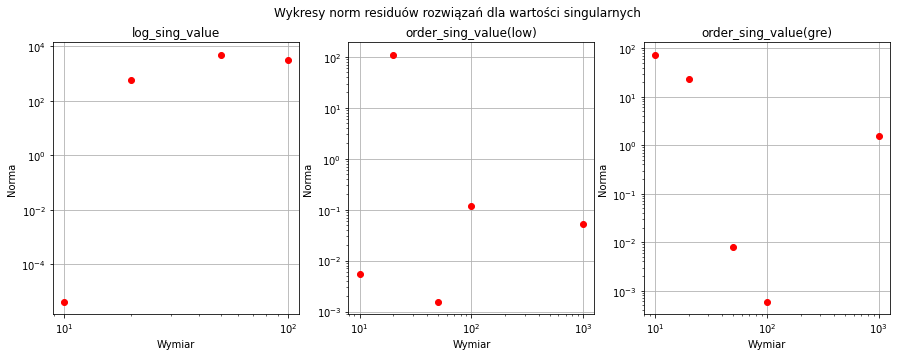

In [26]:
# Ad 5
result_log = []
result_low = []
result_gre = []

norms_log = []
norms_low = []
norms_gre = []

for i in range(len(matrix)):
    result_log.append(np.linalg.solve(matrix_SVD_log[i], vector[i]))
    result_low.append(np.linalg.solve(matrix_SVD_low[i], vector[i]))
    result_gre.append(np.linalg.solve(matrix_SVD_gre[i], vector[i]))
    
    norms_log.append(main.residual_norm(matrix_SVD_log[i], result_log[i], vector[i]))
    norms_low.append(main.residual_norm(matrix_SVD_low[i], result_low[i], vector[i]))
    norms_gre.append(main.residual_norm(matrix_SVD_gre[i], result_gre[i], vector[i]))


plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.suptitle('Wykresy uwarunkowań macierzy dla wartości singularnych')
plt.loglog(m, cond_log, 'bo')
plt.title('log_sing_value')
plt.xlabel('Wymiar')
plt.ylabel('Uwarunkowanie')
plt.grid()

plt.subplot(1,3,2)
plt.loglog(m, cond_low, 'bo')
plt.title('order_sing_value(low)')
plt.xlabel("Wymiar")
plt.ylabel("Uwarunkowanie")
plt.grid()

plt.subplot(1,3,3)
plt.loglog(m, cond_gre, 'bo')
plt.title('order_sing_value(gre)')
plt.xlabel("Wymiar")
plt.ylabel("Uwarunkowanie")
plt.grid()


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.suptitle('Wykresy norm residuów rozwiązań dla wartości singularnych')
plt.loglog(m, norms_log, 'ro')
plt.title('log_sing_value')
plt.xlabel('Wymiar')
plt.ylabel('Norma')
plt.grid()

plt.subplot(1,3,2)
plt.loglog(m, norms_low, 'ro')
plt.title('order_sing_value(low)')
plt.xlabel("Wymiar")
plt.ylabel("Norma")
plt.grid()

plt.subplot(1,3,3)
plt.loglog(m, norms_gre, 'ro')
plt.title('order_sing_value(gre)')
plt.xlabel("Wymiar")
plt.ylabel("Norma")
plt.grid()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)